In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

In [2]:
# Read the data
oil_path = '../data/oil-prices-master/data/'
wti_path = '../data/oil-prices-master/data/'
population_path = '../data/population-master/data/'
ppp_path = '../data/ppp-master/data/'

oil_prices_data = pd.read_csv(oil_path + 'brent-year.csv')
wti_year_data = pd.read_csv(wti_path + 'wti-year.csv')
population_data = pd.read_csv(population_path + 'population.csv')
ppp_data = pd.read_csv(ppp_path + 'ppp-gdp.csv')

# Population for 1960 - 2018 (line graph)

In [3]:
# select countries according to the variant ("Spain","Bangladesh","Iceland")
spain_population = population_data[population_data['Country Name'] == 'Spain']
bangladesh_population = population_data[population_data['Country Name'] == 'Bangladesh']
iceland_population = population_data[population_data['Country Name'] == 'Iceland']

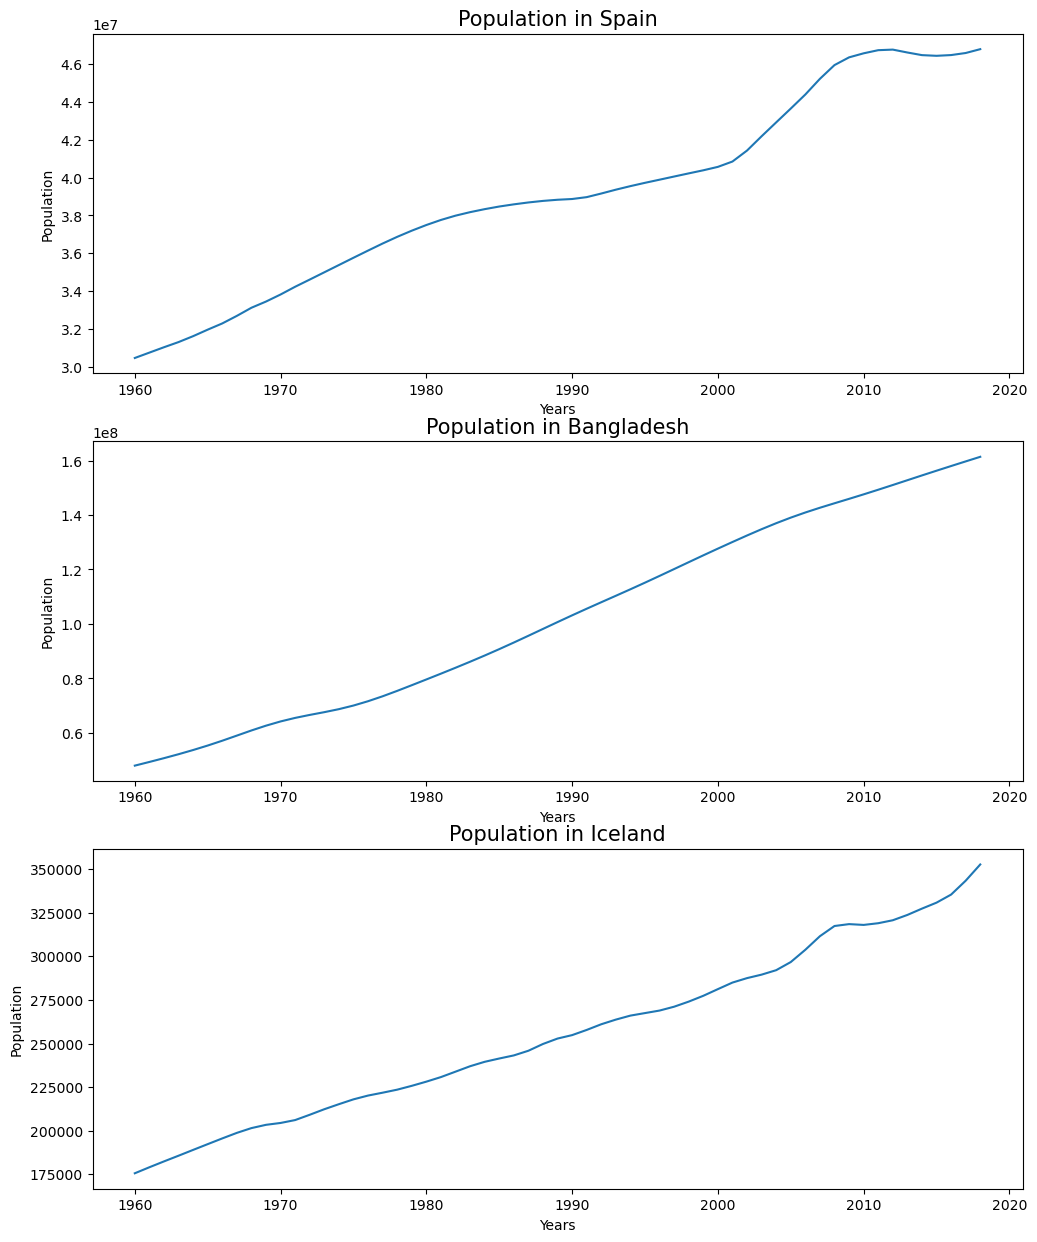

In [4]:
fig1, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,15))

ax1.plot(spain_population['Year'], spain_population['Value'])
ax1.set_title('Population in Spain', fontsize = 15)
ax1.set_xlabel('Years', fontsize = 10)
ax1.set_ylabel('Population', fontsize = 10)

ax2.plot(bangladesh_population['Year'], bangladesh_population['Value'])
ax2.set_title('Population in Bangladesh', fontsize = 15)
ax2.set_xlabel('Years', fontsize = 10)
ax2.set_ylabel('Population', fontsize = 10)

ax3.plot(iceland_population['Year'], iceland_population['Value'])
ax3.set_title('Population in Iceland', fontsize = 15)
ax3.set_xlabel('Years', fontsize = 10)
ax3.set_ylabel('Population', fontsize = 10)
plt.show()
fig1.savefig('../img/population_countries_line.png')

# Population for 2003 - 2018 (pie chart)

In [5]:
value_years = [int(i) for i in range(2003, 2019)]
spain_years = spain_population[spain_population['Year'].isin(value_years)]
bangladesh_years = bangladesh_population[bangladesh_population['Year'].isin(value_years)]
iceland_years = iceland_population[iceland_population['Year'].isin(value_years)]
mylabels = [str(i) for i in value_years]

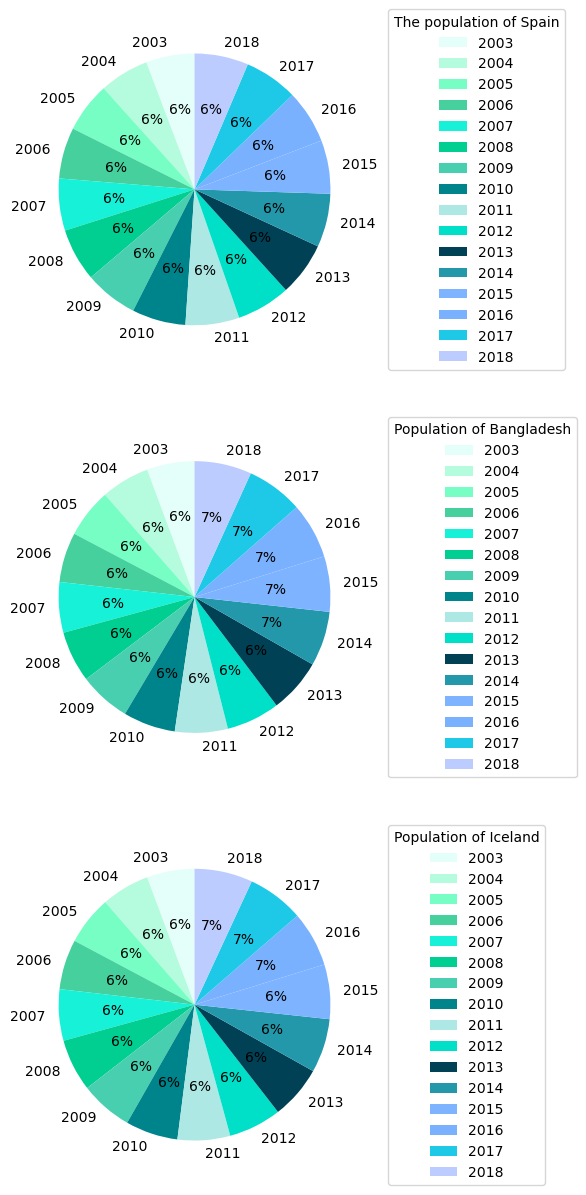

In [6]:
fig2, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(25,15))

colors = ['#E4FFF9', '#B5FBDD', '#76FEC5', '#45D09E', '#17F1D7', '#00CF91', '#48CFAF', '#00848C',
          '#AEE8E4', '#00DFC8', '#004156', '#2398AB', '#7EB3FF', '#7AB1FF', '#1EC9E8', '#BDCCFF',]

ax1.pie(spain_years['Value'], labels=mylabels, startangle = 90, autopct='%1.0f%%', colors=colors)
ax1.legend(title = "The population of Spain", bbox_to_anchor=(1.05, 1.05))

ax2.pie(bangladesh_years['Value'], labels=mylabels, startangle = 90, autopct='%1.0f%%', colors=colors)
ax2.legend(title = "Population of Bangladesh", bbox_to_anchor=(1.05, 1.05))

ax3.pie(iceland_years['Value'], labels=mylabels, startangle = 90, autopct=f'%1.0f%%', colors=colors)
ax3.legend(title = "Population of Iceland", bbox_to_anchor=(1.05, 1.05))

plt.show()
fig2.savefig('../img/population_countries_pie.png')

# Population for 1960 - 2018 (bar graph)

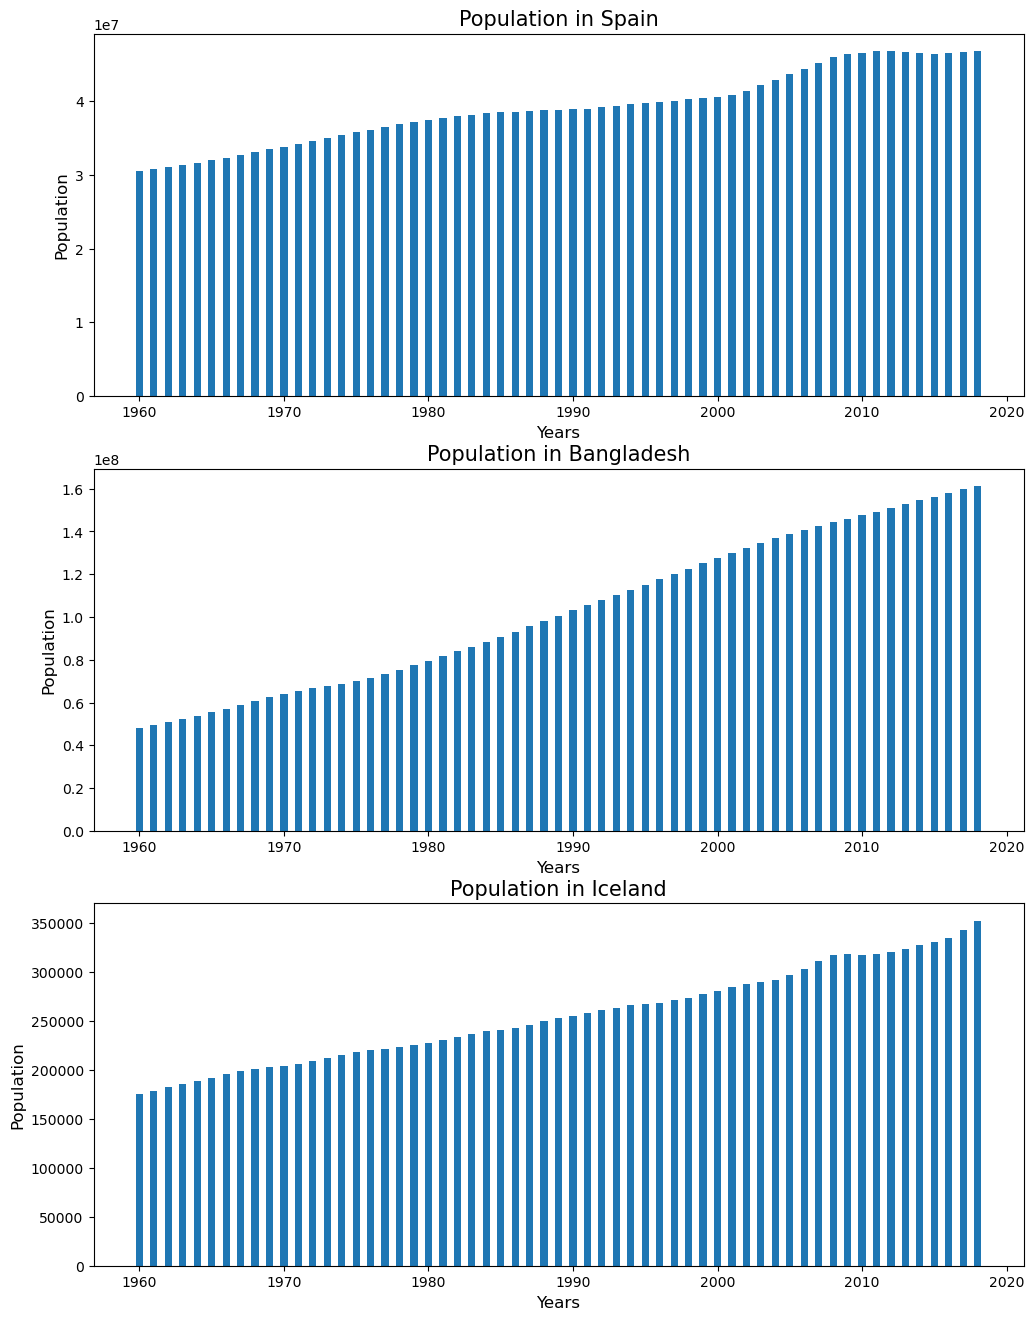

In [7]:
fig3, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,16))
ax1.bar(spain_population['Year'], spain_population['Value'], width = 0.5)
ax1.set_title('Population in Spain', fontsize = 15)
ax1.set_xlabel('Years', fontsize = 12)
ax1.set_ylabel('Population', fontsize = 12)

ax2.bar(bangladesh_population['Year'], bangladesh_population['Value'], width = 0.5)
ax2.set_title('Population in Bangladesh', fontsize = 15)
ax2.set_xlabel('Years', fontsize = 12)
ax2.set_ylabel('Population', fontsize = 12)

ax3.bar(iceland_population['Year'], iceland_population['Value'], width = 0.5)
ax3.set_title('Population in Iceland',  fontsize = 15)
ax3.set_xlabel('Years', fontsize = 12)
ax3.set_ylabel('Population', fontsize = 12)
plt.show()
fig3.savefig('../img/population_countries_bar.png')

# The main statistical values of the population of the countries

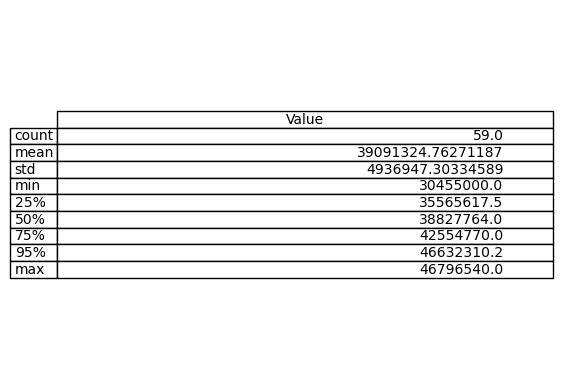

In [8]:
# Spain
spain_population_desc = spain_population['Value'].describe(percentiles=[.25, .75, .95])
plot_1 = plt.subplot(111, frame_on=False)
plot_1.xaxis.set_visible(False) 
plot_1.yaxis.set_visible(False) 
table(plot_1, spain_population_desc, loc='center right')
plt.savefig('../img/main_statistical_values_spain.png')

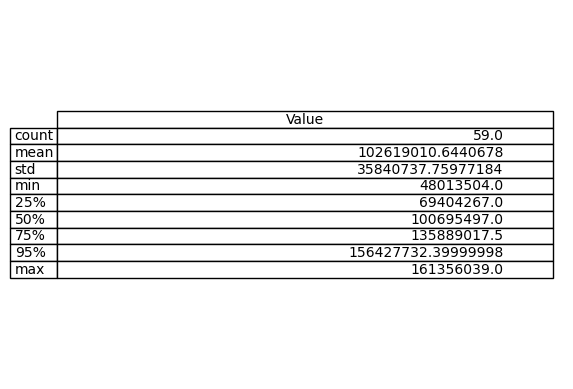

In [9]:
# Bangladesh
bangladesh_desc = bangladesh_population['Value'].describe(percentiles=[.25, .75, .95])
plot_2 = plt.subplot(111, frame_on=False)
plot_2.xaxis.set_visible(False) 
plot_2.yaxis.set_visible(False) 
table(plot_2, bangladesh_desc, loc='center right')
plt.savefig('../img/main_statistical_values_bangladesh.png')

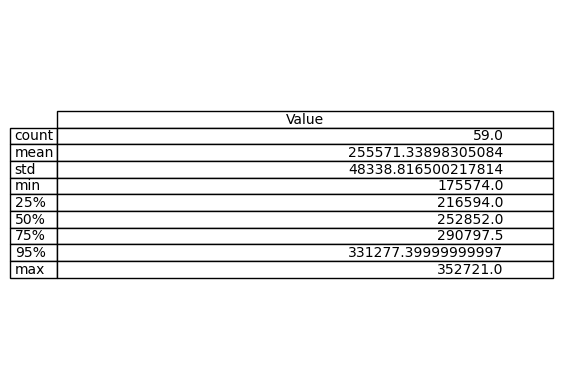

In [10]:
# Iceland
iceland_desc = iceland_population['Value'].describe(percentiles=[.25, .75, .95])
plot_3 = plt.subplot(111, frame_on=False)
plot_3.xaxis.set_visible(False) 
plot_3.yaxis.set_visible(False) 
table(plot_3, iceland_desc, loc='center right')
plt.savefig('../img/main_statistical_values_iceland.png')

# The relationship between oil prices and purchasing power parity

In [11]:
# select countries according to the variant ("Spain","Bangladesh","Iceland")
spain_ppp = ppp_data[ppp_data['Country'] == 'Spain']
bangladesh_ppp = ppp_data[ppp_data['Country'] == 'Bangladesh']
iceland_ppp = ppp_data[ppp_data['Country'] == 'Iceland']

# merging tables for comparison
oil_prices_data = oil_prices_data.rename(columns={"Date": "Year"})
spain_oilprices_ppp = spain_ppp.merge(oil_prices_data, how='inner', on='Year')
bangladesh_oilprices_ppp = bangladesh_ppp.merge(oil_prices_data, how='inner', on='Year')
iceland_oilprices_ppp = iceland_ppp.merge(oil_prices_data, how='inner', on='Year')

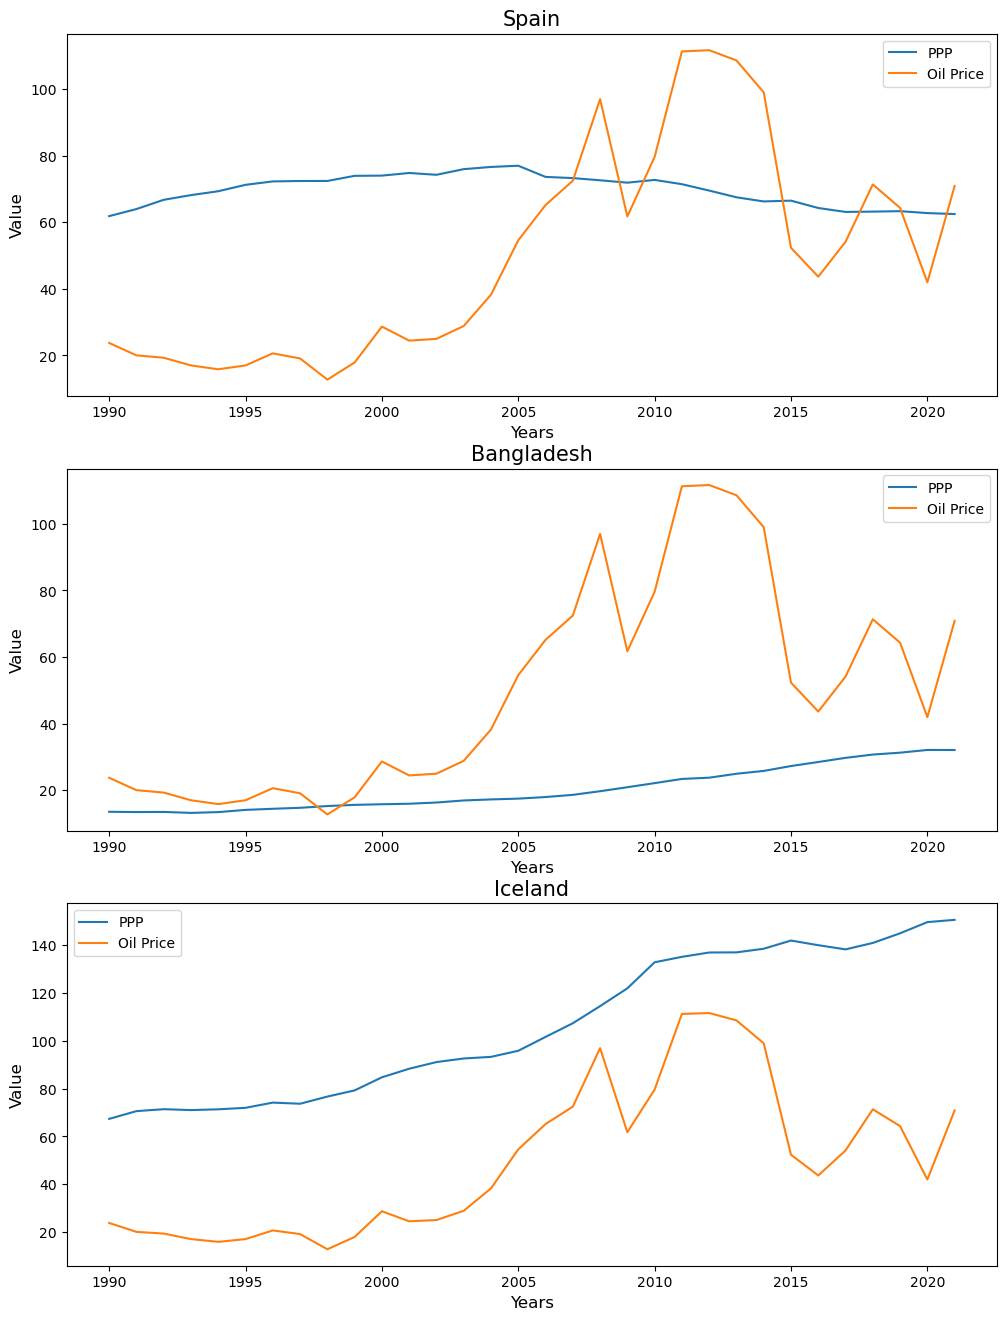

In [12]:
fig4, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,16))
ax1.plot(spain_oilprices_ppp['Year'], spain_oilprices_ppp['PPP']*100, label='PPP')
ax1.plot(spain_oilprices_ppp['Year'], spain_oilprices_ppp['Price'], label='Oil Price')
ax1.set_title('Spain', fontsize = 15)
ax1.set_xlabel('Years', fontsize = 12)
ax1.set_ylabel('Value', fontsize = 12)
ax1.legend()

ax2.plot(bangladesh_oilprices_ppp['Year'], bangladesh_oilprices_ppp['PPP'], label='PPP')
ax2.plot(bangladesh_oilprices_ppp['Year'], bangladesh_oilprices_ppp['Price'], label='Oil Price')
ax2.set_title('Bangladesh', fontsize = 15)
ax2.set_xlabel('Years', fontsize = 12)
ax2.set_ylabel('Value', fontsize = 12)
ax2.legend()

ax3.plot(iceland_oilprices_ppp['Year'], iceland_oilprices_ppp['PPP'], label='PPP')
ax3.plot(iceland_oilprices_ppp['Year'], iceland_oilprices_ppp['Price'], label='Oil Price')
ax3.set_title('Iceland', fontsize = 15)
ax3.set_xlabel('Years', fontsize = 12)
ax3.set_ylabel('Value', fontsize = 12)
ax3.legend()
plt.show()
fig4.savefig('../img/correlation_oil_ppp.png')

# The relationship between population and purchasing power parity

In [13]:
# merging tables for comparison
spain_population_ppp = spain_population.merge(spain_ppp, how='inner', on='Year')
bangladesh_population_ppp = bangladesh_population.merge(bangladesh_ppp, how='inner', on='Year')
iceland_population_ppp = iceland_population.merge(iceland_ppp, how='inner', on='Year')

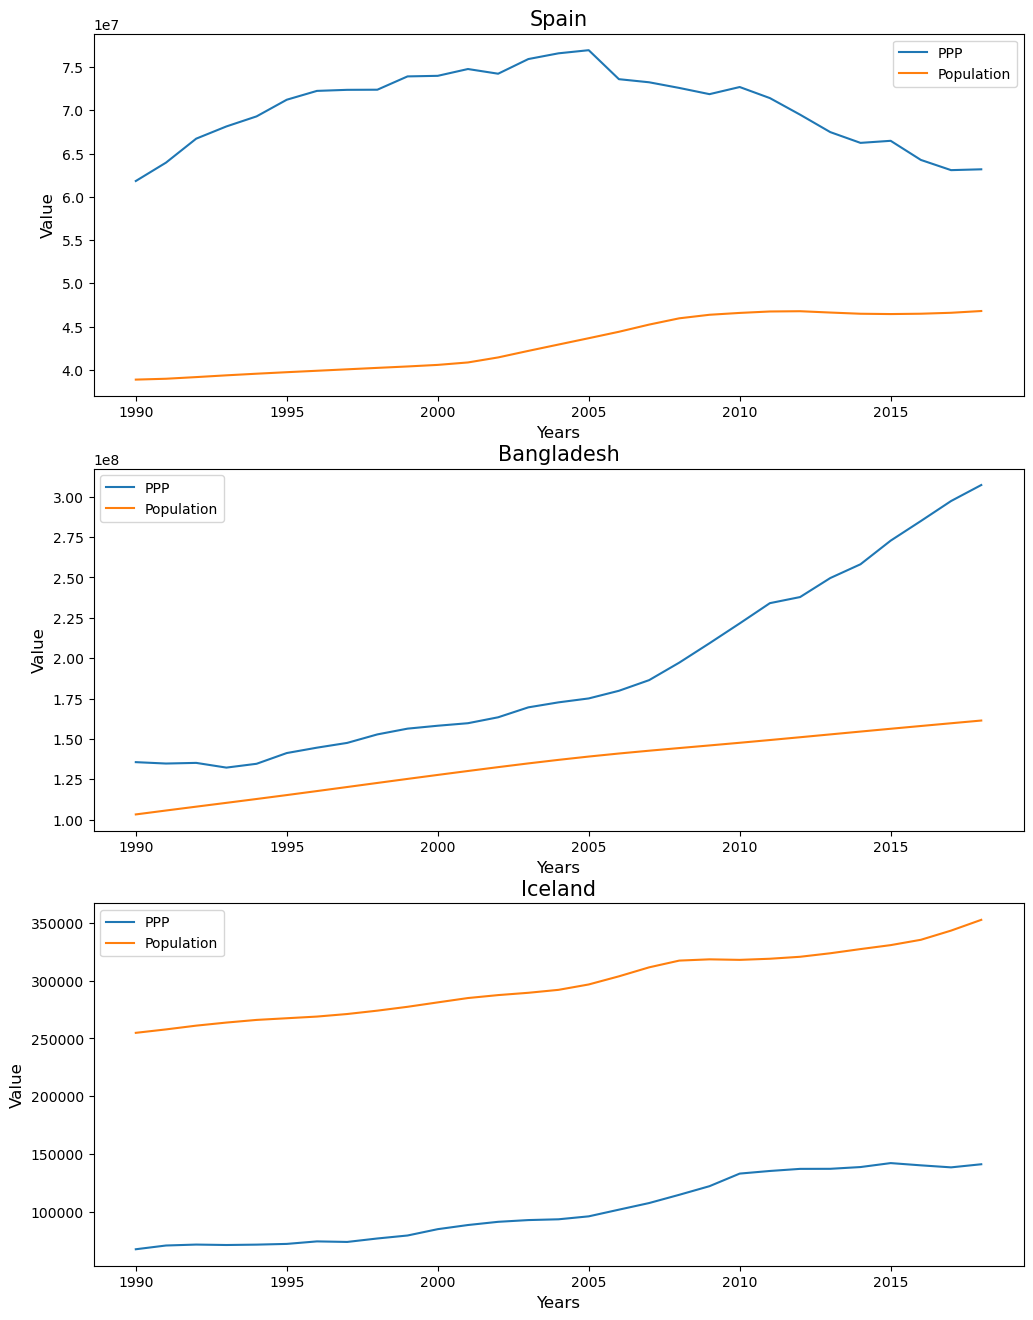

In [14]:
fig5, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,16))
ax1.plot(spain_population_ppp['Year'], spain_population_ppp['PPP']*100000000, label='PPP')
ax1.plot(spain_population_ppp['Year'], spain_population_ppp['Value'], label='Population')
ax1.set_title('Spain', fontsize = 15)
ax1.set_xlabel('Years', fontsize = 12)
ax1.set_ylabel('Value', fontsize = 12)
ax1.legend()

ax2.plot(bangladesh_population_ppp['Year'], bangladesh_population_ppp['PPP']*10000000, label='PPP')
ax2.plot(bangladesh_population_ppp['Year'], bangladesh_population_ppp['Value'], label='Population')
ax2.set_title('Bangladesh', fontsize = 15)
ax2.set_xlabel('Years', fontsize = 12)
ax2.set_ylabel('Value', fontsize = 12)
ax2.legend()

ax3.plot(iceland_population_ppp['Year'], iceland_population_ppp['PPP']*1000, label='PPP')
ax3.plot(iceland_population_ppp['Year'], iceland_population_ppp['Value'], label='Population')
ax3.set_title('Iceland', fontsize = 15)
ax3.set_xlabel('Years', fontsize = 12)
ax3.set_ylabel('Value', fontsize = 12)
ax3.legend()
plt.show()

fig5.savefig('../img/correlation_population_ppp.png')

# The relationship between population and the price of oil

In [15]:
# merging tables for comparison
spain_population_oilp = spain_population.merge(oil_prices_data, how='inner', on='Year')
bangladesh_population_oilp = bangladesh_population.merge(oil_prices_data, how='inner', on='Year')
iceland_population_oilp = iceland_population.merge(oil_prices_data, how='inner', on='Year')

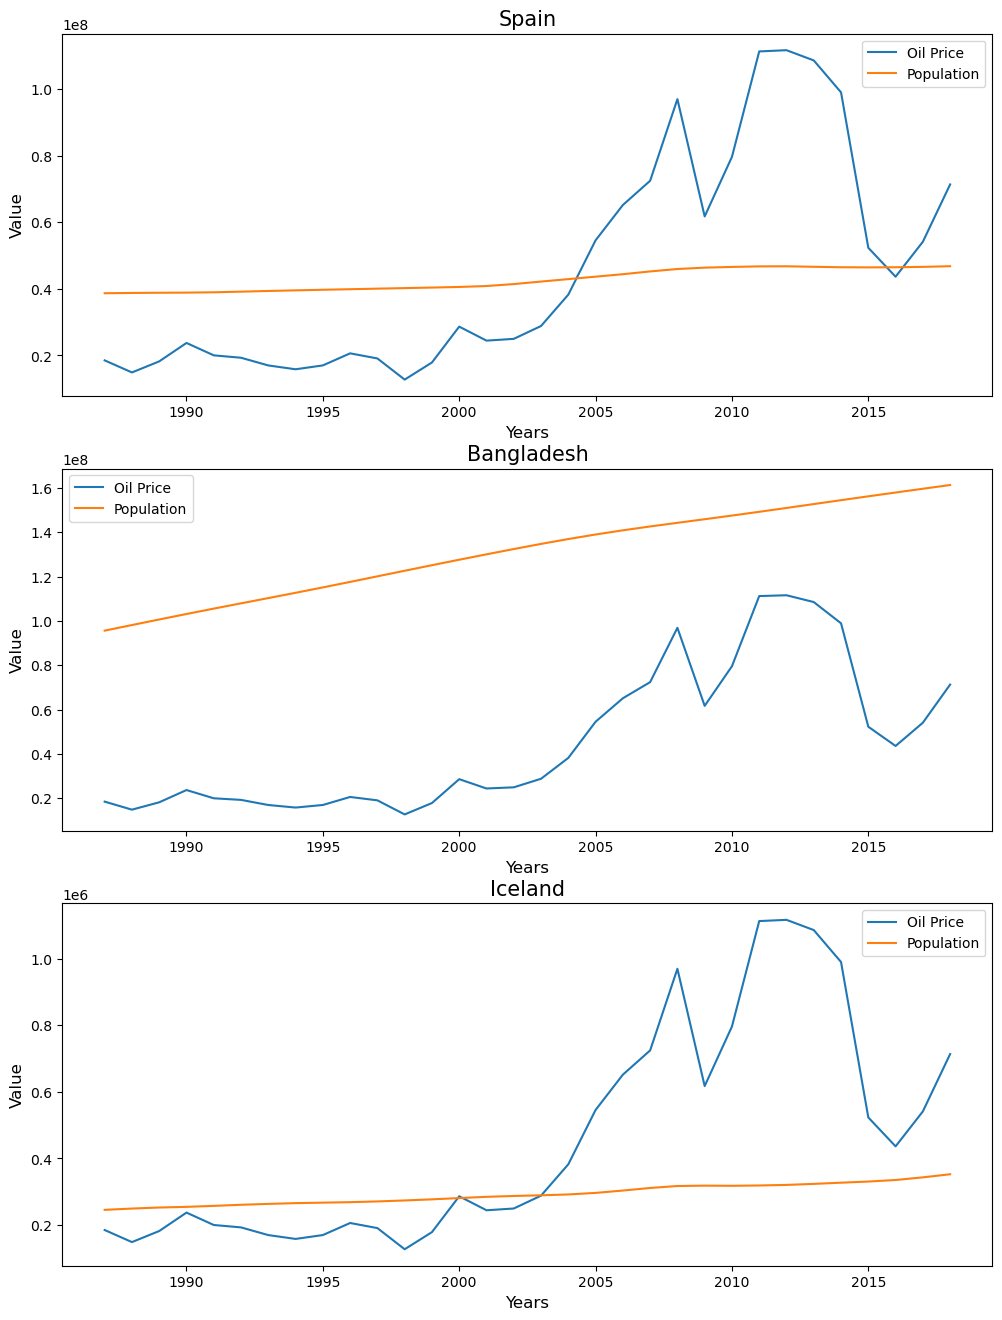

In [16]:
fig6, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,16))
ax1.plot(spain_population_oilp['Year'], spain_population_oilp['Price']*1000000, label='Oil Price')
ax1.plot(spain_population_oilp['Year'], spain_population_oilp['Value'], label='Population')
ax1.set_title('Spain', fontsize = 15)
ax1.set_xlabel('Years', fontsize = 12)
ax1.set_ylabel('Value', fontsize = 12)
ax1.legend()

ax2.plot(bangladesh_population_oilp['Year'], bangladesh_population_oilp['Price']*1000000, label='Oil Price')
ax2.plot(bangladesh_population_oilp['Year'], bangladesh_population_oilp['Value'], label='Population')
ax2.set_title('Bangladesh', fontsize = 15)
ax2.set_xlabel('Years', fontsize = 12)
ax2.set_ylabel('Value', fontsize = 12)
ax2.legend()

ax3.plot(iceland_population_oilp['Year'], iceland_population_oilp['Price']*10000, label='Oil Price')
ax3.plot(iceland_population_oilp['Year'], iceland_population_oilp['Value'], label='Population')
ax3.set_title('Iceland', fontsize = 15)
ax3.set_xlabel('Years', fontsize = 12)
ax3.set_ylabel('Value', fontsize = 12)
ax3.legend()
plt.show()
fig6.savefig('../img/correlation_population_oil.png')

# The percentage of PPP of an individual country to the average PPP of all countries

In [17]:
ppp_data = ppp_data.groupby("Year", group_keys=False).mean('PPP')

In [18]:
def mean_val(ppp, ppp_mean=ppp_data):
    plot = ppp
    plot = plot.sort_values(by=['Year'])
    plot = plot.groupby('Year').mean()
    ans = plot['PPP'] * 100 / ppp_mean['PPP']
    return ans

In [19]:
spain_plot = pd.DataFrame([])
bangladesh_plot = pd.DataFrame([])
iceland_plot = pd.DataFrame([])

spain_plot['Mean'] = mean_val(spain_ppp)
bangladesh_plot['Mean'] = mean_val(bangladesh_ppp)
iceland_plot['Mean'] = mean_val(iceland_ppp)

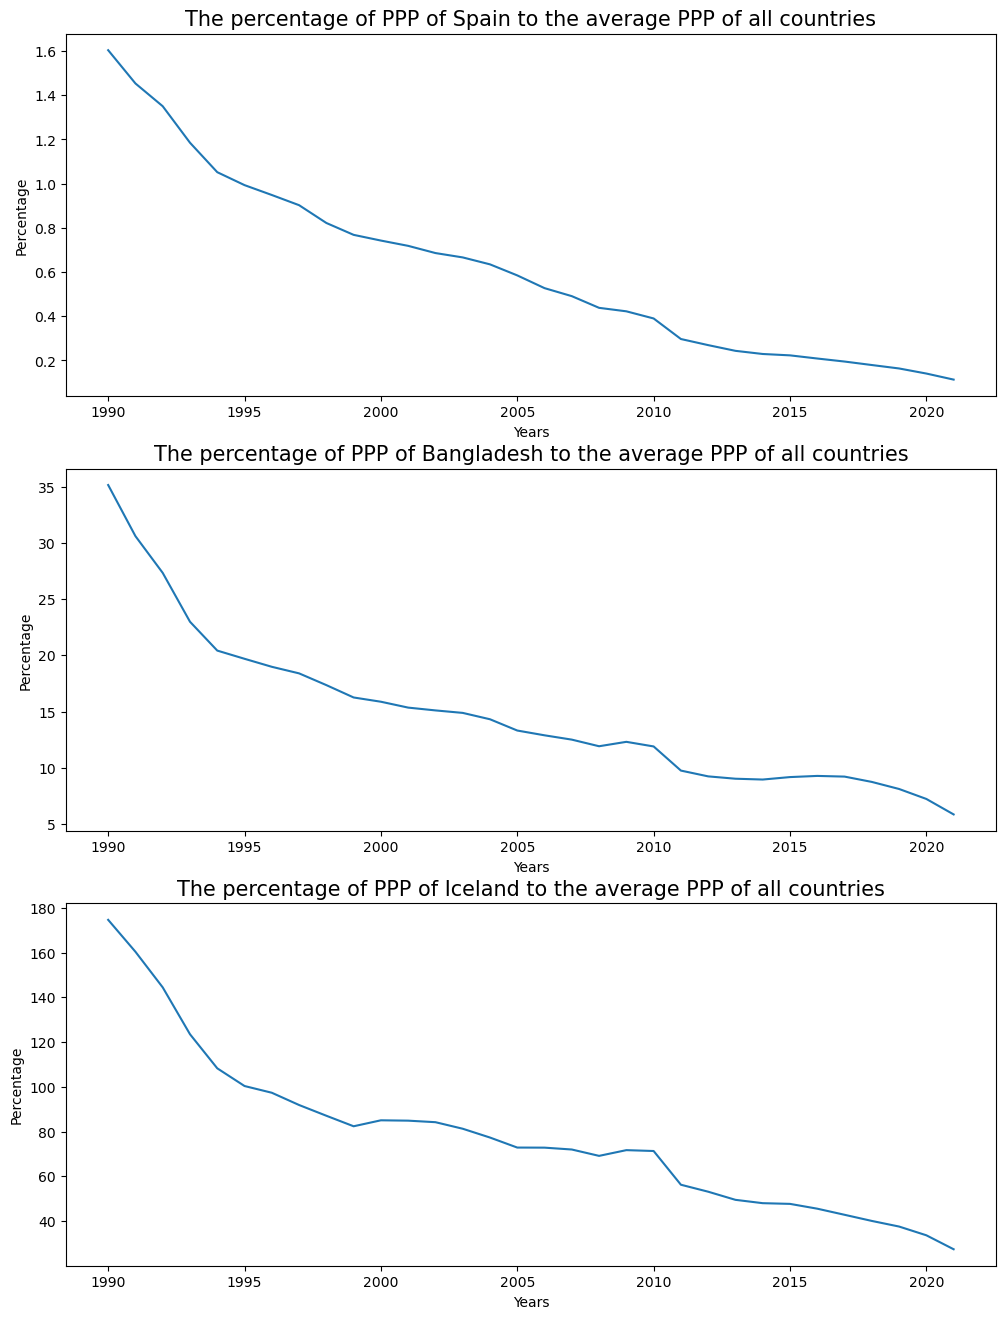

In [20]:
fig7, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,16))

ax1.plot(spain_plot.index.values, spain_plot['Mean'])
ax1.set_title('The percentage of PPP of Spain to the average PPP of all countries', fontsize = 15)
ax1.set_xlabel('Years', fontsize = 10)
ax1.set_ylabel('Percentage', fontsize = 10)

ax2.plot(bangladesh_plot.index.values, bangladesh_plot['Mean'])
ax2.set_title('The percentage of PPP of Bangladesh to the average PPP of all countries', fontsize = 15)
ax2.set_xlabel('Years', fontsize = 10)
ax2.set_ylabel('Percentage', fontsize = 10)

ax3.plot(iceland_plot.index.values, iceland_plot['Mean'])
ax3.set_title('The percentage of PPP of Iceland to the average PPP of all countries', fontsize = 15)
ax3.set_xlabel('Years', fontsize = 10)
ax3.set_ylabel('Percentage', fontsize = 10)
plt.show()
fig7.savefig('../img/percentage_ppp.png')